In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [30]:
np.random.seed(42)

In [31]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls"
df = pd.read_excel(url)

In [132]:
print("\nDataset Information:")
print(f"Shape: {df.shape}")
print(df.head())


Dataset Information:
Shape: (1080, 82)
  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.

In [40]:
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Missing values per column:
BCL2_N       285
H3MeK4_N     270
BAD_N        213
EGR1_N       210
H3AcK18_N    180
            ... 
CaNA_N         0
Genotype       0
Treatment      0
Behavior       0
class          0
Length: 82, dtype: int64


In [42]:
df = df.fillna(df.select_dtypes(include=['number']).mean())

Gi popolnuvame kolonite kade shto ima missing values so srednata vrednost na taa kolona

In [133]:
print(df.columns.tolist())

['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class']


In [134]:
X = df.iloc[:, 1:-4]  
y_true = df.iloc[:, -1]

X e koloni samo so proteinska ekspresija

In [136]:
print("\nProcessed dataset shape:", X.shape)
print("Broj na klasi vo originalnotot mnozhestvo:", y_true.nunique())



Processed dataset shape: (1080, 77)
Broj na klasi vo originalnotot mnozhestvo: 8


In [107]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Odzemame srednata vrednost i delime so standardna devijacija- norm
Kreirame PCA so 3 komponenti i gi transformirame podatocite vo 3D prostor

In [108]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

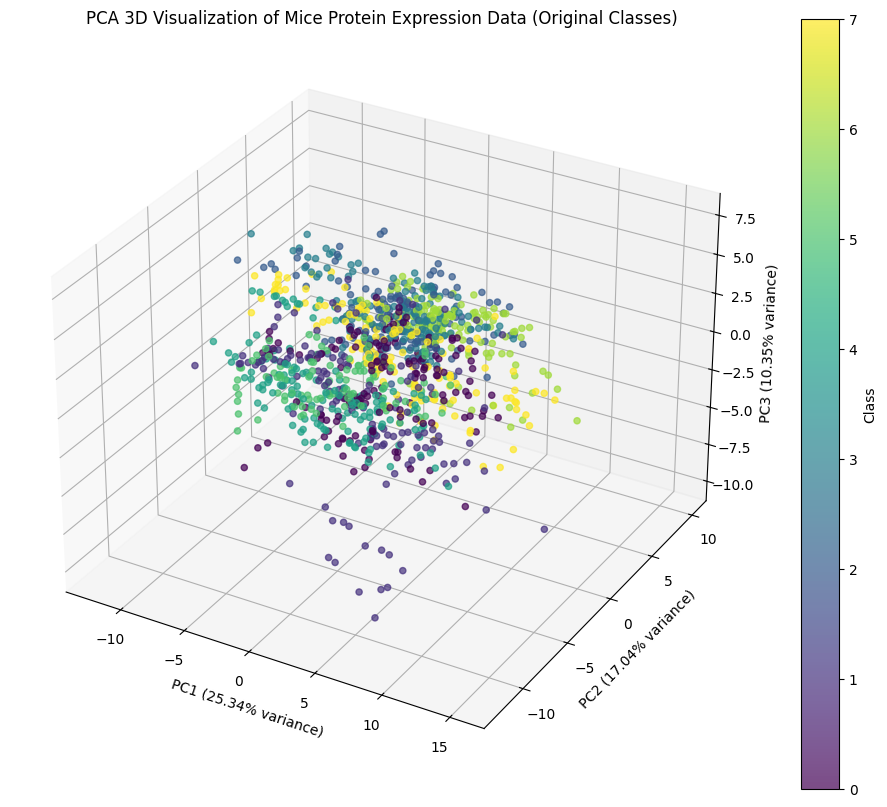

In [109]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=y_true.astype('category').cat.codes, cmap='viridis', alpha=0.7)
ax.set_title('PCA 3D Visualization of Mice Protein Expression Data (Original Classes)')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Class')
plt.show()

Tochkite se oboeni spored originalnite klasi vo 3D

Opredeluvanjeto na optimalniot broj klasteri go izvrshiv so silhoutte score. Silhoutte score meri kolku edna podatochna tochka e slichna so nejziniot klaster vo sporedba so drugite klasteri. Score od 1 e najdobra vrednost nasproti score od -1.

In [122]:
silhouette_scores = []
range_n_clusters = range(2, 15)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Za n_clusters = {n_clusters}, silhouette score e: {silhouette_avg:.3f}")

Za n_clusters = 2, silhouette score e: 0.143
Za n_clusters = 3, silhouette score e: 0.129
Za n_clusters = 4, silhouette score e: 0.121
Za n_clusters = 5, silhouette score e: 0.115
Za n_clusters = 6, silhouette score e: 0.121
Za n_clusters = 7, silhouette score e: 0.124
Za n_clusters = 8, silhouette score e: 0.134
Za n_clusters = 9, silhouette score e: 0.132
Za n_clusters = 10, silhouette score e: 0.128
Za n_clusters = 11, silhouette score e: 0.129
Za n_clusters = 12, silhouette score e: 0.136
Za n_clusters = 13, silhouette score e: 0.131
Za n_clusters = 14, silhouette score e: 0.133


In [120]:
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimalniot broj na klasteri spored silhouette score: {optimal_n_clusters}")


Optimalniot broj na klasteri spored silhouette score: 2


In [123]:
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_pca_3d)

In [124]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca_3d)

In [125]:
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hc_labels = hc.fit_predict(X_pca_3d)

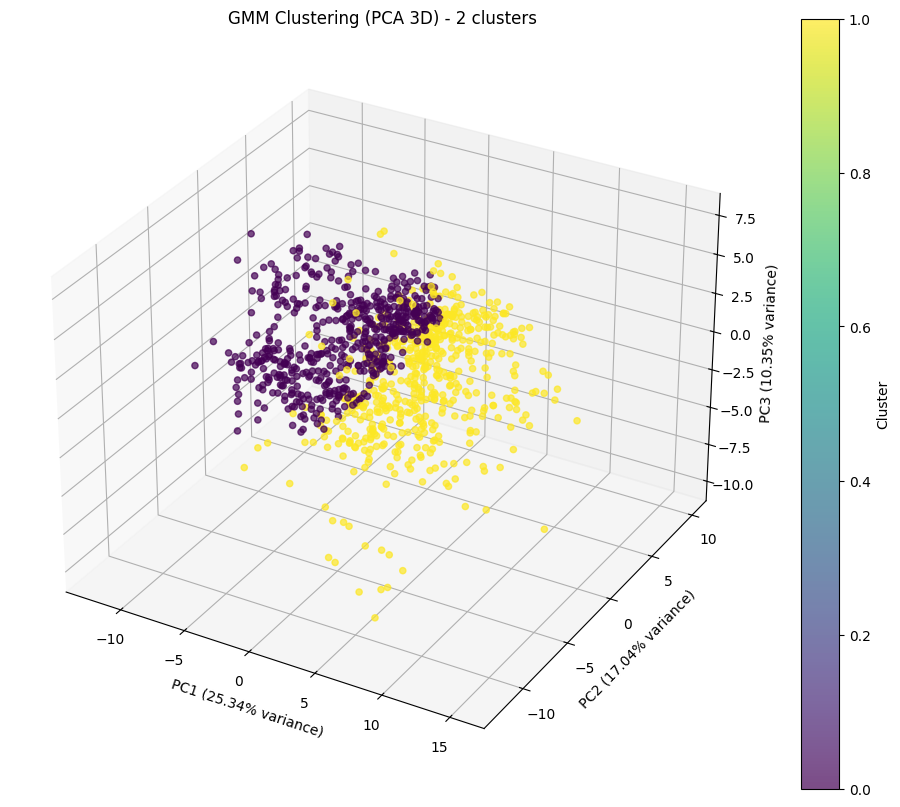

In [126]:
#GMM
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=gmm_labels, cmap='viridis', alpha=0.7)
ax.set_title(f'GMM Clustering (PCA 3D) - {n_clusters} clusters')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

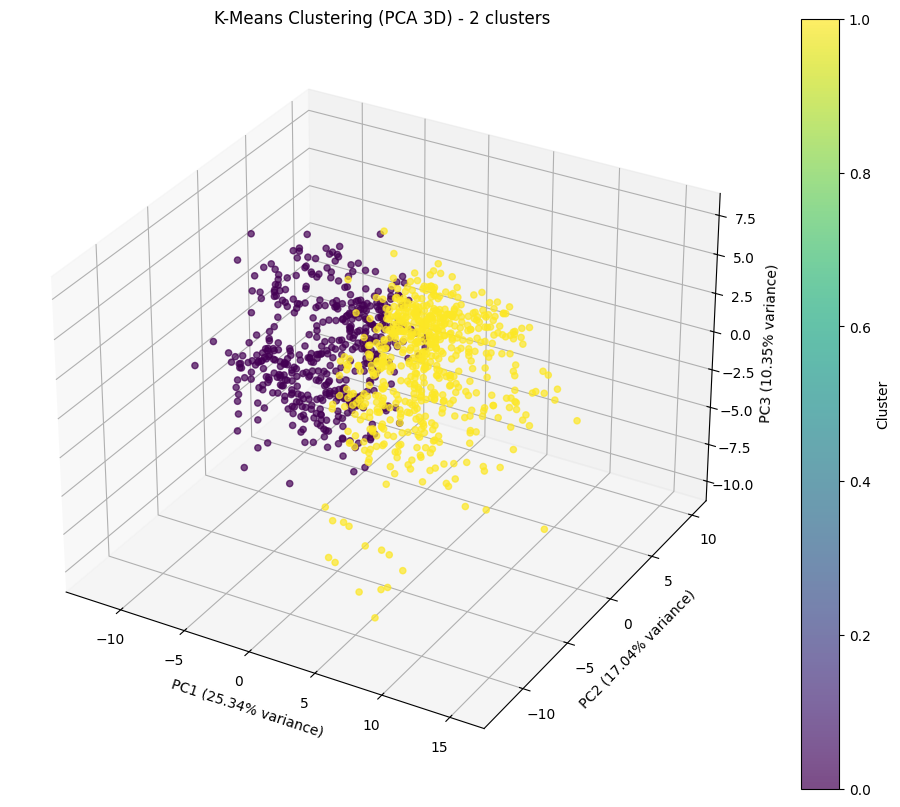

In [127]:
#K-MEANS
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=kmeans_labels, cmap='viridis', alpha=0.7)
ax.set_title(f'K-Means Clustering (PCA 3D) - {n_clusters} clusters')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

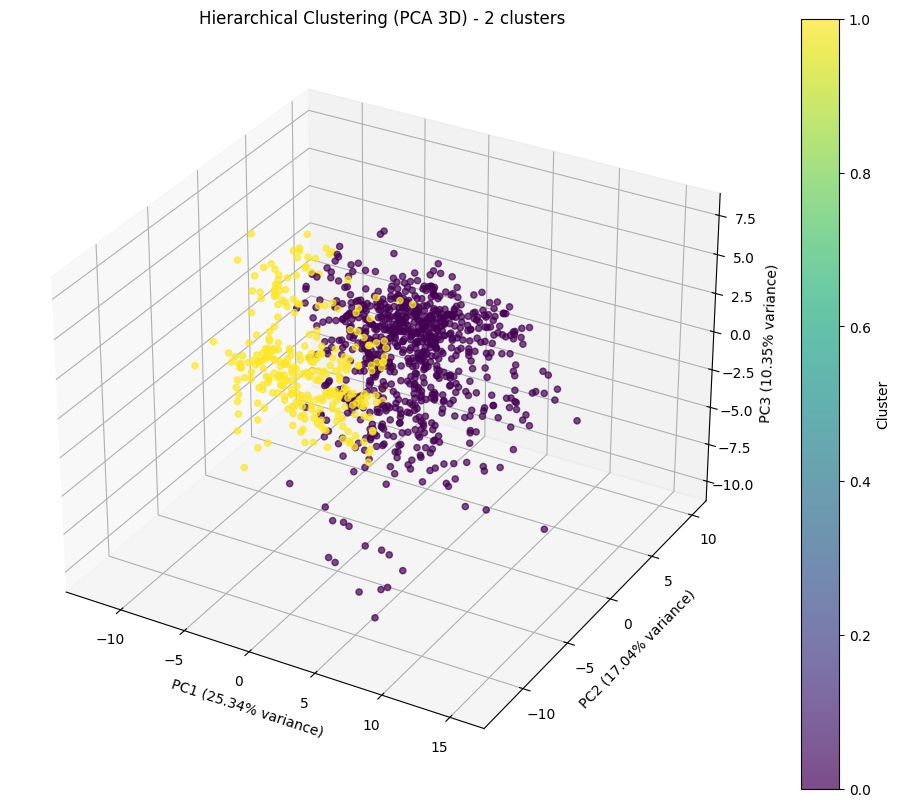

In [128]:
#HIERARHISKO
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=hc_labels, cmap='viridis', alpha=0.7)
ax.set_title(f'Hierarchical Clustering (PCA 3D) - {n_clusters} clusters')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

Smetam deka K-means i GMM se dobri modeli za ova podatochno mnozhestvo i eve zoshto:
Vzuelizacijata so PCA ni pokazhuva deka podatocite formiraat jasni klasteri, i dvata algoritmi davaat priblizhno isti rezultati, za razlika od niv hirearhiskotot dade poloshi rezultati.
GMM e pofleksibilen bidejki dozvoluva klasteri so sekakvi formi i golemini shto znachi e pogoden za vakov tip na bioloshki podatoci.
K-means e pobrz i ima pomalku over-fitting kaj nego i sepak dava dobri rezultati vo generalnoto grupiranje.

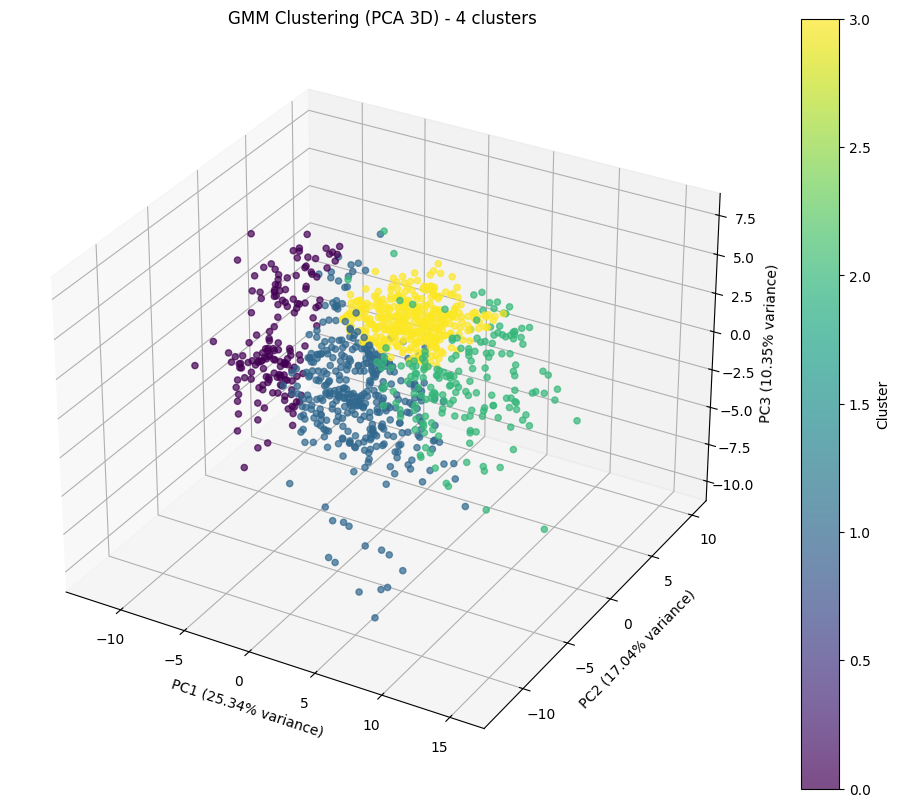

In [129]:
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_pca_3d)

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca_3d)

hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hc_labels = hc.fit_predict(X_pca_3d)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=gmm_labels, cmap='viridis', alpha=0.7)
ax.set_title(f'GMM Clustering (PCA 3D) - {n_clusters} clusters')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

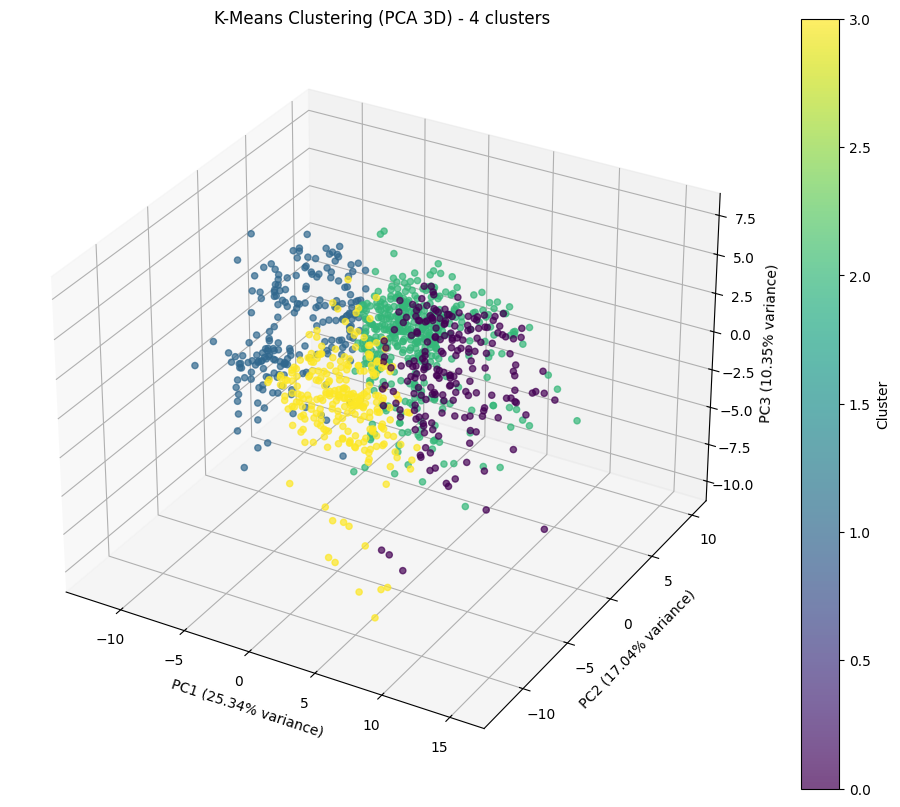

In [130]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=kmeans_labels, cmap='viridis', alpha=0.7)
ax.set_title(f'K-Means Clustering (PCA 3D) - {n_clusters} clusters')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

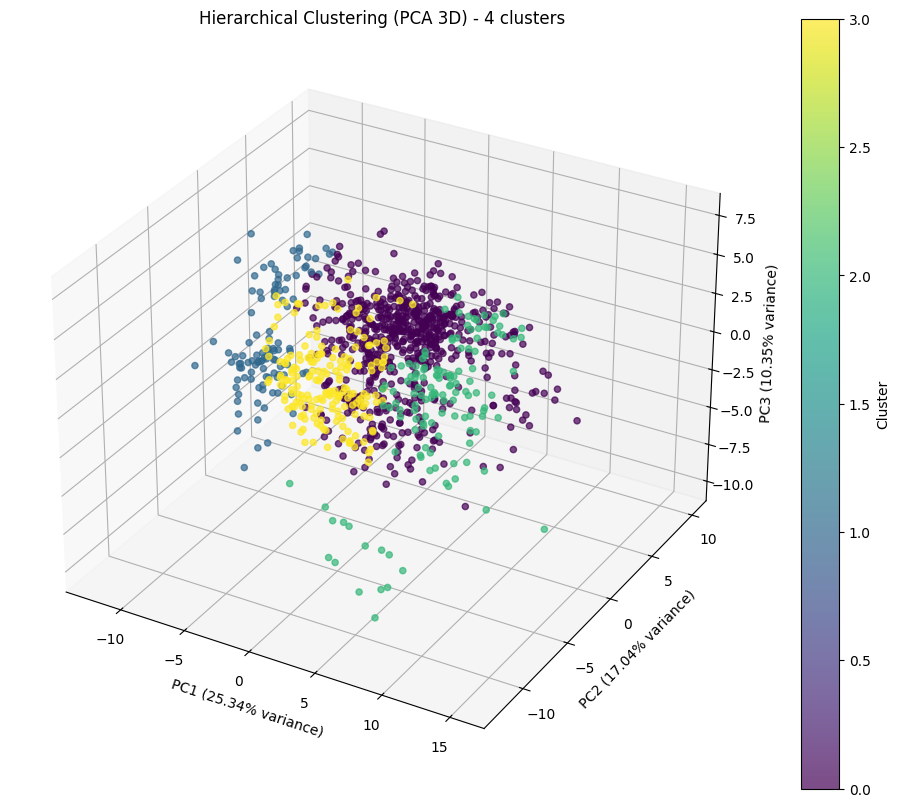

In [131]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=hc_labels, cmap='viridis', alpha=0.7)
ax.set_title(f'Hierarchical Clustering (PCA 3D) - {n_clusters} clusters')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()